In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sidetable
import re 

In [167]:
plt.style.use(['ggplot'])

In [168]:
style_list = ['default', 'classic'] + sorted(
    style for style in plt.style.available
    if style != 'classic' and not style.startswith('_'))

In [169]:
#style_list

In [170]:
df= pd.read_pickle("data/data_final.pickle") #Abrimos el dataframe

In [171]:
df.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,Salario muy bajo,NO


In [172]:
df.shape

(25973, 24)

In [173]:
df.dtypes

level_0                     int64
index                       int64
time                        int64
age                        object
gender                     object
pais                       object
formacion                  object
puesto                     object
experiencia_prog           object
lenguaje_top               object
exp_ml                     object
tamaño_empresa             object
uso_ml                     object
salario                    object
inversion_ml               object
ppal_herramienta_data      object
lenguaje_prog              object
plataforma                 object
plat_cursos                object
nubes                      object
plataforma_top             object
salario_max                 Int64
rango_salario            category
europa                     object
dtype: object

#### Vamos a ir recorriendo cada una de las preguntas y llamando a los diferentes funciones creadas, generandon los dataframes ajustados para poder responder y sacar conclusiones de la mejor manera

### - ¿Cual es el ratio de hombres y mujeres segun el perfil? (posibilidad nivel mundial)
- Columnas que toca:
        - 'gender'= no tiene nulos asique esta lista, verificar unique para descartar que no tenga cosas raras.
        - 'puesto' = tampoco tiene nulos, ver uniques y ver si recategorizamos por menos cantidades.


In [174]:
df['puesto'].unique()# Verificamos valores unicos de la columna puesto 

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [175]:
df['puesto'].value_counts()# hacemos un conteo de los mismos

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

Para nuestra pregunta vamos a creamos un nuevo dataframe que no contemple como puesto las categorias 'Student', 'Other' y 'Currently not employed'

In [176]:
df_puesto_genero= df[ ~df['puesto'].isin(['Student','Other', 'Currently not employed'])] 

In [177]:
df_puesto_genero.shape

(14790, 24)

In [178]:
df_puesto_genero['puesto'].unique()

array(['Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

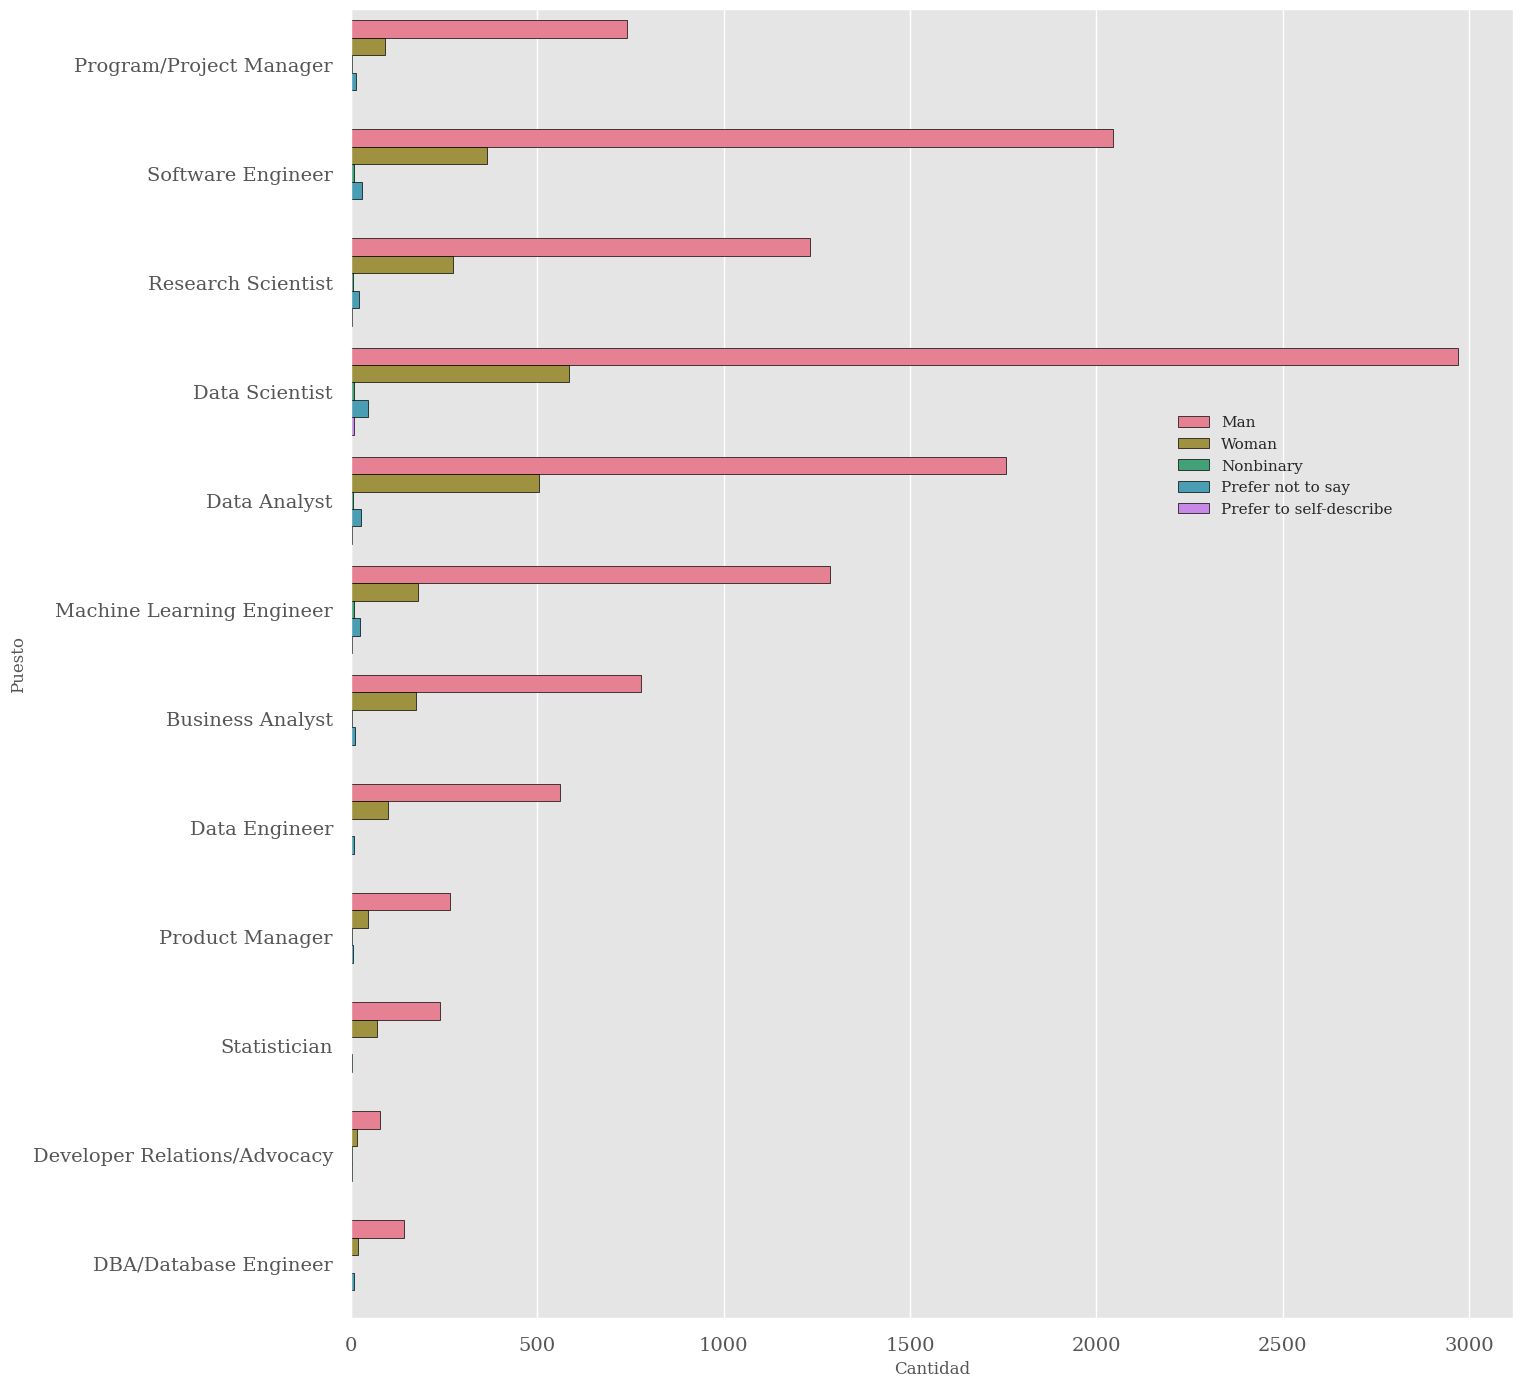

In [179]:
plt.figure(figsize = (15, 17))

fig = sns.countplot(data = df_puesto_genero, y = "puesto", hue = "gender", palette = "husl", edgecolor = "black")

fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set(font = "serif")

plt.legend(bbox_to_anchor = (0.7, 0.7))

plt.xlabel("Cantidad", fontsize = 20, font = "serif")
plt.ylabel("Puesto", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

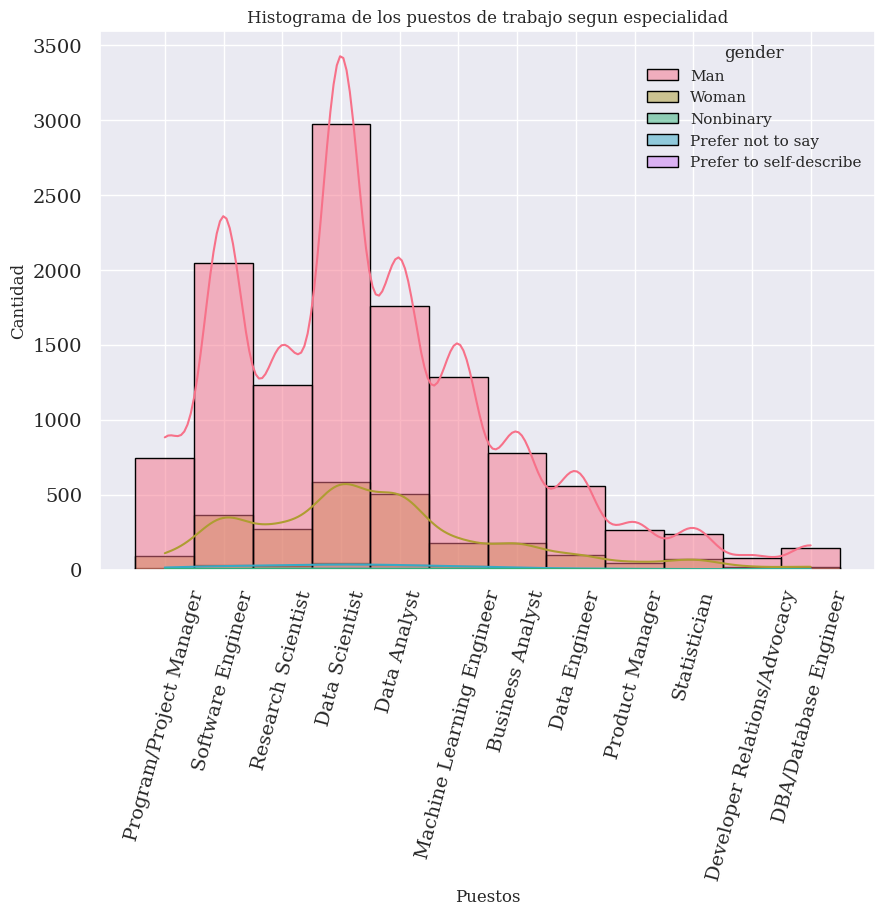

In [180]:
plt.figure(figsize =(10,7))

fig = sns.histplot(x='puesto', data = df_puesto_genero, palette = "husl", hue = 'gender', edgecolor = "black",kde=True)
fig.set_title('Histograma de los puestos de trabajo segun especialidad')
plt.xticks(rotation= 75)
plt.xlabel("Puestos", fontsize = 20, font = "serif")
plt.ylabel("Cantidad", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

plt.show()

### Conclusiones:

#### podriamos hacer un grafico de porcentajes por cada puesto con los porcentajes segun genero no se me ocurre como

---

### - ¿Cual es perfil educativo para cada puesto? (Europa)
- Columnas que toca:
    - puesto = no tiene nulos ver si categorizamos mejor o si nos enfocamos en uno en particular.
    - formacion= no tiene nulos, ver que hacer con studens o los que no respondieron.
Ver si damos vuelta de rosca y lo profundizamos mas para mujeres y un pais o continente especifico!

In [181]:
df.head()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,Salario muy bajo,NO
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,Salario muy bajo,NO
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,$0 ($USD),"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",DataCamp,I do not share my work publicly,NaN,999,Salario muy bajo,NO
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,$0 ($USD),"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",edX,NaN,NaN,39999,Salario muy bajo,NO
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,...,"$1000-$9,999","Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN,39999,Salario muy bajo,NO


In [182]:
df_europa_puestos=df_puesto_genero[ df_puesto_genero['europa'] == 'SI'] #FILTRAMOS DESDE EL DF QUE NO TIENE EN CUENTA 'Student','Other', 'Currently not employed'

In [183]:
df_europa_puestos.shape

(2568, 24)

In [184]:
df_europa_puestos['pais'].unique() #VER QUE HACEMOS CON RUSSIA

array(['Greece', 'Belgium', 'Poland', 'Russia', 'France', 'Italy',
       'Sweden', 'Spain', 'Austria', 'Ireland', 'Ukraine', 'Denmark',
       'Germany', 'Portugal', 'Netherlands', 'Romania', 'Switzerland',
       'Norway', 'Belarus', 'Czech Republic'], dtype=object)

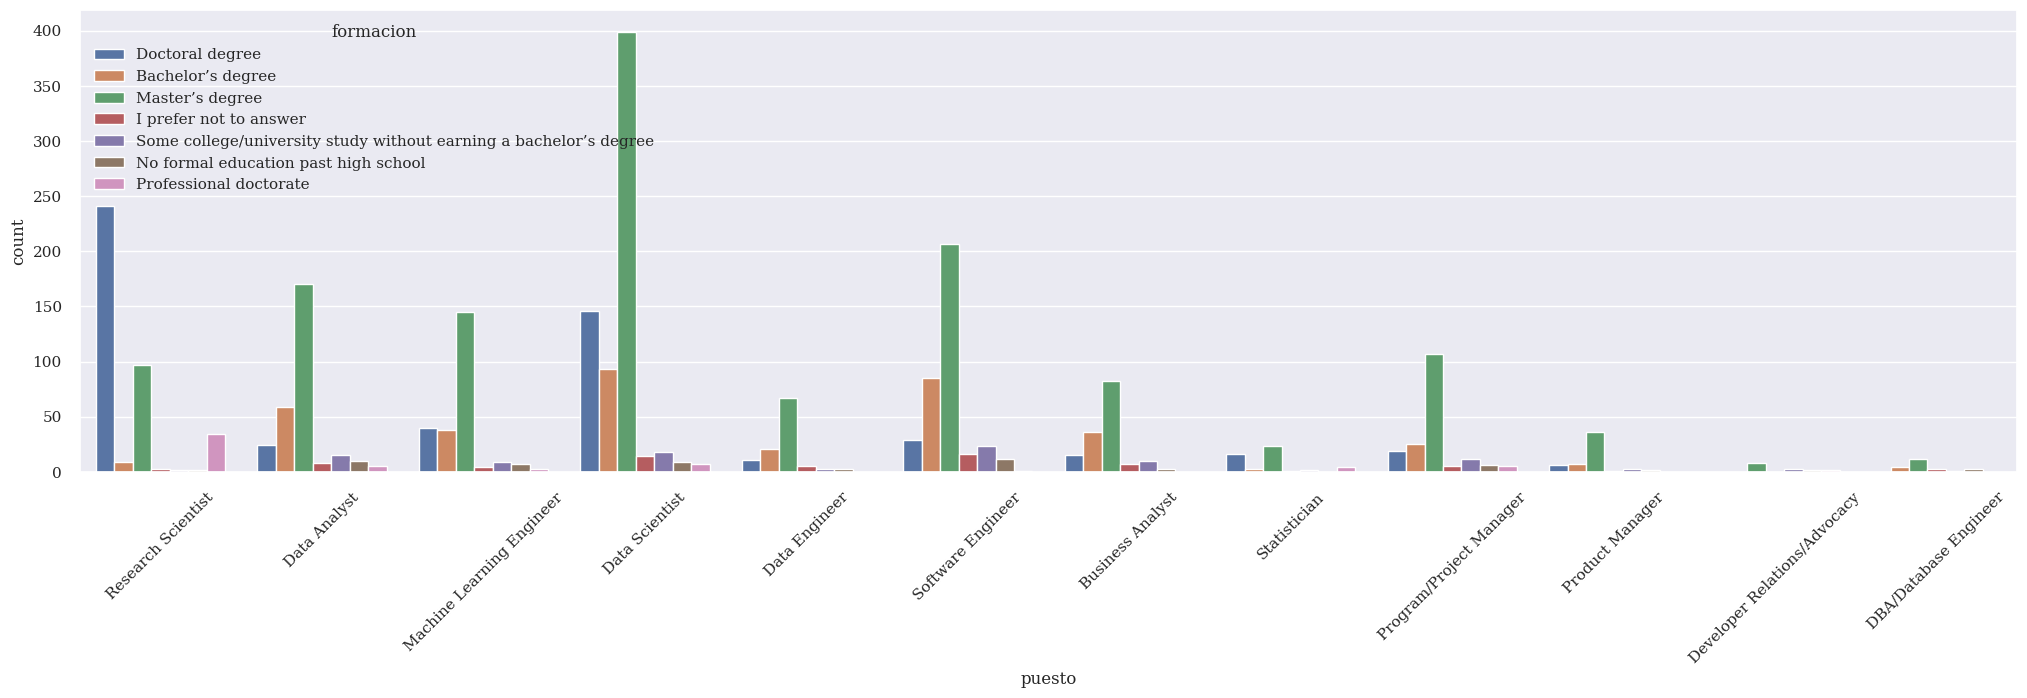

In [185]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df_europa_puestos, hue= 'formacion')
plt.xticks(rotation = 45)

plt.show(); 

---

### - Herramientas mas utilizadas segun los perfiles. (leguaje_prog y plataforma)(Europa)
- Columnas que toca:
    - ppal_herramienta_data: tiene muchos muchos nulos, ver si podemos aplicar alguno de los metodos de imputer para solucionarlo o en el caso que lo sesgemos solo para un area especifica volver a verificar nulos ahi.
    - puesto = no tiene nulos, ver lo de la recategorizacion
Me parece interesante poder mezclar esta pregunta con otras dos columnas mas como son lenguaje_prog y plataforma para poder tener el combo de todo lo que se usa en ese area.

---

### - ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil? 
- Columnas que toca:
    - gender: no tiene nulos
    - salarios : poder hacer analisis de numeros con medias y demas segun genero.. verificar que cantidad de datos de hombre y mujer hay en el dataframe para jugar un poco con la poderacion.

In [186]:
df_europa_salarios= df[ df['europa'] == 'SI']# filtramos a Europa desde el df total.

In [187]:
df_europa_salarios.shape

(3777, 24)

In [188]:
df_europa_salarios['salario_max'].unique()

<IntegerArray>
[   <NA>,   14999,    2999,   29999,   39999,     999,    3999,   49999,
   59999,  149999,   69999,   19999,   79999,  124999,   24999,    4999,
    1999,   99999,   89999, 1000000,    9999,    7499,  249999,  199999,
  999999,  299999,  499999]
Length: 27, dtype: Int64

<AxesSubplot:xlabel='gender', ylabel='salario_max'>

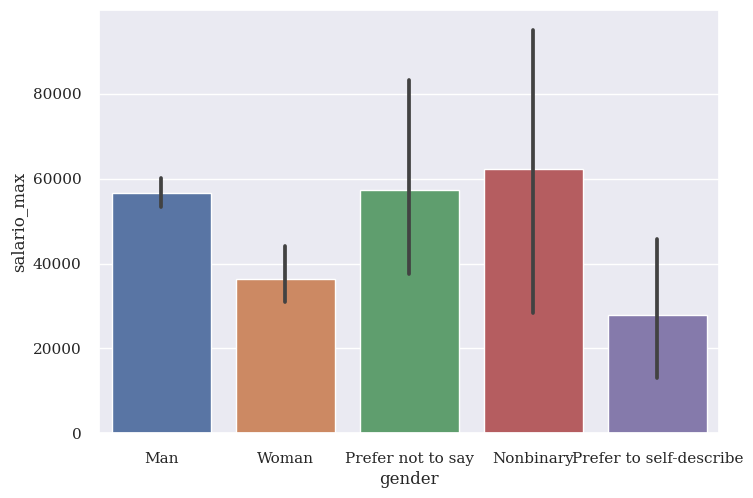

In [189]:
sns.barplot(x='gender',y='salario_max',data= df_europa_salarios)# Media de salarios por genero en paises de europa

In [190]:
df_europa_salarios.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,...,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa
8,8,8,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,...,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL",Other,Kaggle Learn Courses,NaN,NaN,<NA>,NaN,SI
15,15,15,563,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,Python,...,$0 ($USD),"Local development environments (RStudio, Jupyt...","Python, C, C++, MATLAB",Spyder,"Udacity,University Courses (resulting in a uni...",NaN,NaN,14999,Salario muy bajo,SI


In [191]:
df_europa_salarios.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'rango_salario', 'europa'],
      dtype='object')

In [192]:
lista_categoricas= ['age', 'gender', 'pais', 'formacion','puesto', 'experiencia_prog']

Gráfico de radar en plotly con line_polar
La función line_polar de plotly express permite crear gráficos de radar o spider plots en Python. Para ello tendrás que pasar los valores numéricos al argumento r y los grupos o categorías a theta, tanto como nombres de columna de un data frame o como arrays. Ten en cuenta que puedes establecer line_close como True para dibujar una línea extra entre el primer y último punto, en caso de ser necesario.

In [193]:
df_europa_salarios.stb.missing()

,missing,total,percent
plataforma_top,3364,3777,89.065396
nubes,2168,3777,57.400053
inversion_ml,1131,3777,29.944400
rango_salario,1101,3777,29.150119
salario_max,1101,3777,29.150119
salario,1101,3777,29.150119
uso_ml,998,3777,26.423087
tamaño_empresa,963,3777,25.496426
plat_cursos,920,3777,24.357956
ppal_herramienta_data,829,3777,21.948636


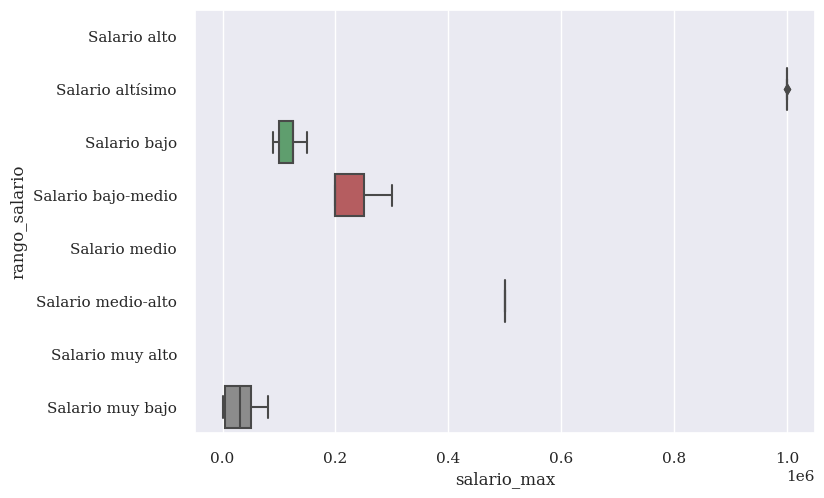

In [194]:
sns.boxplot(x = 'salario_max', y='rango_salario',   data = df_europa_salarios); 

In [217]:
df_europa_salarios['salario_max'].mean()

SyntaxError: f-string: unmatched '[' (1551496504.py, line 1)

In [196]:
df_europa_salarios['salario_max'].min()

999

In [197]:
df_europa_salarios['salario_max'].max()

1000000

In [198]:
df_europa_salarios['salario_max'].median()

39999.0

In [199]:
from sklearn.impute import SimpleImputer

### Ver si decidimos sacar medianas por puesto para reemplazar mas equitativamente!

In [200]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)# Reemplazamos nulos por mediana

In [201]:
imputer = imputer.fit(df[['salario_max']])

In [206]:
df_europa_salarios['salario_max_imputer'] = imputer.transform(df_europa_salarios[['salario_max']])

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_25587/2062901643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europa_salarios['salario_max_imputer'] = imputer.transform(df_europa_salarios[['salario_max']])


In [216]:
import plotly.express as px # VER DE GESTIONAR LOS OUTLAIERS
import pandas as pd


           
fig = px.line_polar(df_europa_salarios, r = 'salario_max_imputer', theta = 'pais', line_close = True)

fig.show()

/Users/anamor/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

